<a href="https://colab.research.google.com/github/rajivsresearch/SP500/blob/master/Does_Bitcoin_predict_SP_500.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install yfinance

     |████████████████████████████████| 5.5MB 7.1MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.55-py2.py3-none-any.whl size=22616 sha256=576dfd56d96eb10fec157aff75bb36cb42538bbf38771c54d1259da8cc6d86a1
  Stored in directory: /root/.cache/pip/wheels/04/98/cc/2702a4242d60bdc14f48b4557c427ded1fe92aedf257d4565c
Successfully built yfinance
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Get stock data from Yahoo Finance

def GetStockData(tickerSymbol, start, end):
  #get data on this ticker
  tickerData = yf.Ticker(tickerSymbol)

  #get the historical prices for this ticker
  tickerDf = tickerData.history(period='1d', start=start, end=end)

  #see your data
  return tickerDf[['Close']]

In [ ]:
sp = GetStockData('^GSPC', '2014-01-01', '2021-1-31')
bit = GetStockData('BTC-USD', '2014-01-01', '2021-1-31')

In [ ]:
sp.head()

,Close
Date,
2014-01-02,1831.979980
2014-01-03,1831.369995
2014-01-06,1826.770020
2014-01-07,1837.880005
2014-01-08,1837.489990


In [ ]:
bit.head()

,Close
Date,
2014-09-17,457.334015
2014-09-18,424.440002
2014-09-19,394.795990
2014-09-20,408.903992
2014-09-21,398.821014


In [ ]:
sp['Scaled'] = (sp['Close'] - sp['Close'].min())/(sp['Close'].max() - sp['Close'].min())

In [ ]:
bit['Scaled'] = (bit['Close'] - bit['Close'].min())/(bit['Close'].max() - bit['Close'].min())

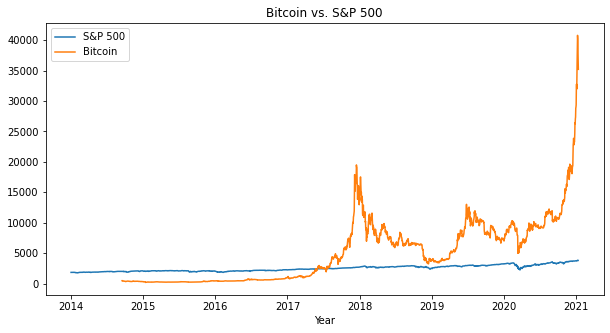

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(sp.index.values, sp.values, label='S&P 500')
plt.plot(bit.index.values, bit.values, label='Bitcoin')
plt.title('Bitcoin vs. S&P 500')
plt.xlabel('Year')
plt.legend()

In [ ]:
import datetime as dt

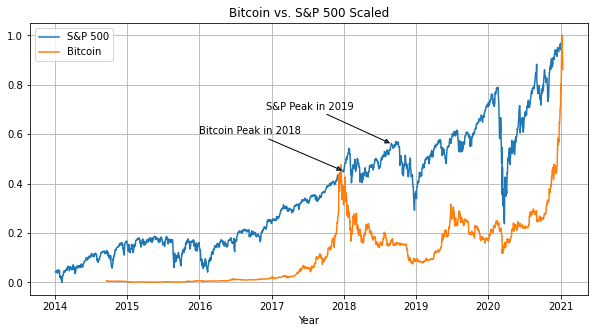

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(sp.index.values, sp.Scaled.values, label='S&P 500')
plt.plot(bit.index.values, bit.Scaled.values, label='Bitcoin')
plt.title('Bitcoin vs. S&P 500 Scaled')
plt.xlabel('Year')
plt.legend()
plt.grid()
plt.annotate('Bitcoin Peak in 2018',(dt.datetime(2018, 1, 1),0.45), 
             xytext=(dt.datetime(2016, 1, 1),0.6), arrowprops=dict(arrowstyle='-|>'))
plt.annotate('S&P Peak in 2019',(dt.datetime(2018, 9, 1),0.56), 
             xytext=(dt.datetime(2016, 12, 1),0.7), arrowprops=dict(arrowstyle='-|>'))

plt.savefig('Bitcoin Predicts S&P.png')

In [ ]:
dt.datetime(2018, 1, 1)

datetime.datetime(2018, 1, 1, 0, 0)